# Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface


In [2]:
root = Path('../../Datasets/MS COCO')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'train2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

# load vocab
with open('idx_to_string.json') as json_file:
    idx_to_string_json = json.load(json_file)
        
idx_to_string = dict()
for key in idx_to_string_json:
    idx_to_string[int(key)] = idx_to_string_json[key]
    
with open('string_to_index.json') as json_file:
    string_to_index = json.load(json_file)


interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

In [3]:
coco_interface = MSCOCOInterface(**interface_params)

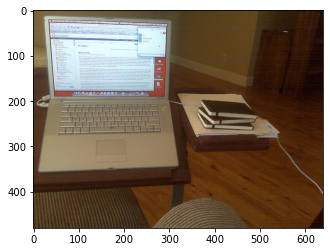

An open laptop computer sitting on top of a wooden table.


In [8]:
random_idx = random.randint(0, len(coco_interface.coco.imgs))
coco_interface.display_img_with_captions(random_idx)
idx, X, y = coco_interface[random_idx]